In [21]:
import sys
import xarray as xr
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#import matplotlib.colors as mcolors

%load_ext autoreload
%autoreload 2
import utils
import databuilder.filemethods as filemethods
from databuilder.data_generator import ClimateData
import databuilder.data_generator as data_generator
import databuilder.filemethods as filemethods

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy version = 1.26.4
xarray version = 2024.2.0


In [16]:
config = utils.get_config("exp000")
seed = config["seed_list"][0]

In [22]:
imp.reload(utils)
imp.reload(filemethods)
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    fetch=True,
    verbose=False
)

<xarray.DataArray 'SAMPLES' (time: 4015, lat: 30, lon: 260, channel: 2)> Size: 251MB
array([[[[            nan,             nan],
         [            nan,             nan],
         [            nan,             nan],
         ...,
         [            nan,             nan],
         [            nan,             nan],
         [            nan,             nan]],

        [[            nan,             nan],
         [            nan,             nan],
         [            nan,             nan],
         ...,
         [            nan,             nan],
         [            nan,             nan],
         [            nan,             nan]],

        [[            nan,             nan],
         [            nan,             nan],
         [            nan,             nan],
         ...,
...
         ...,
         [-4.66377648e-09, -4.66377648e-09],
         [-4.05422140e-09, -4.05422140e-09],
         [-2.67847722e-09, -2.67847722e-09]],

        [[ 2.60703736e-10,  2.60703736e

In [13]:
print(config)

{'expname': 'exp000', 'device': 'gpu', 'seed_list': [7], 'data_dir': '/Users/C830793391/BIG_DATA/E3SM_Data/', 'figure_dir': '/Users/C830793391/Documents/Research/E3SM/saved/figures', 'model_dir': '/Users/C830793391/Documents/Research/E3SM/saved/models', 'output_dir': '/Users/C830793391/Documents/Research/E3SM/saved/outputs', 'fig_dpi': 300, 'databuilder': {'input_vars': ['PRECT', 'TS'], 'input_region': [[-15.0, 15.0, 40.0, 300.0], [-15.0, 15.0, 40.0, 300.0]], 'input_mask': ['None', 'ocean'], 'ensembles': ['ens1', 'ens2', 'ens3'], 'ensemble_codes': ['0101', '0151', '0201'], 'target_var': 'PRECT', 'target_region': [47.6, 122.0], 'target_months': [4, 5, 6, 7, 8, 9], 'averaging_length': 7, 'fig_dpi': 300, 'data_dir': '/Users/C830793391/BIG_DATA/E3SM_Data/'}}


In [23]:
d_train, d_val, d_test = data.fetch_data()

<xarray.DataArray 'SAMPLES' (time: 4015, lat: 30, lon: 260, channel: 2)> Size: 251MB
array([[[[            nan,             nan],
         [            nan,             nan],
         [            nan,             nan],
         ...,
         [            nan,             nan],
         [            nan,             nan],
         [            nan,             nan]],

        [[            nan,             nan],
         [            nan,             nan],
         [            nan,             nan],
         ...,
         [            nan,             nan],
         [            nan,             nan],
         [            nan,             nan]],

        [[            nan,             nan],
         [            nan,             nan],
         [            nan,             nan],
         ...,
...
         ...,
         [-4.66377648e-09, -4.66377648e-09],
         [-4.05422140e-09, -4.05422140e-09],
         [-2.67847722e-09, -2.67847722e-09]],

        [[ 2.60703736e-10,  2.60703736e

In [31]:
d_train["x"][...,0]

<xarray.DataArray 'SAMPLES' (time: 4015, lat: 30, lon: 260)> Size: 125MB
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
         -3.84493770e-09, -3.17518056e-09, -2.09328599e-09],
        [ 3.97684496e-10,  6.22743523e-10,  5.34595479e-10, ...,
         -2.94495739e-09, -4.37183223e-09, -5.97874861e-09],
        [ 2.23161684e-10,  2.28547639e-10,  4.40897249e-11, ...,
         -1.86145666e-09, -3.39735151e-09, -4.28341007e-09]],

       [[-1.50625432e-08,  2.80908741e-09, -4.60900340e-09, ...,
         -3.80291976e-09,  7.17509607e-10,  5.06973263e-09],
        [-7.51287654e-09,  6.11435746e-09, -2.24138530e-09, ...,
          1.31026723e-09,  4.49311299e-09,  8.40411207e-09],
        [-2.81788176e-10,  7.00891434e-09,  1.81623172e-09, ...,
          9.15203469e-09,  9.95038896e-09,  7.35916661e-09],
        ...,
        [ 5.42122770e-11,  6.86244334e-12,  6.51567550e-11, ...,
         -4.66377648e-09, -4.05422140e-09, -2.67847722e-09],
        [ 2.60703736e-10,  3.68706621e-10,  2.66402594e-10, ...,
         -3.28038863e-09, -4.23248459e-09, -5.22797805e-09],
        [ 3.11792647e-10,  3.26343980e-10,  2.01034717e-10, ...,
         -1.89002902e-09, -3.17143800e-09, -3.91238908e-09]]],
      dtype=float32)
Coordinates:
  * time     (time) object 32kB 1850-01-01 00:00:00 ... 1860-12-31 00:00:00
  * lon      (lon) float64 2kB 40.5 41.5 42.5 43.5 ... 296.5 297.5 298.5 299.5
  * lat      (lat) float64 240B -14.5 -13.5 -12.5 -11.5 ... 11.5 12.5 13.5 14.5
Attributes:
    long_name:     None
    units:         None
    cell_methods:  None

### MJO Composites: 

In [453]:
import databuilder.indicescompositor as indicescompositor
from databuilder.indicescompositor import compositeindices
imp.reload(indicescompositor)

MJO_train, MJO_val, MJO_test, phaseindex = compositeindices(config, d_train["x"])

shape phases array: (60225, 3)
shape phaseindex: (60225, 9, 3)
23925


TypeError: invalid indexer array, does not have integer dtype: array([ 0.,  1.,  2., ..., nan, nan, nan])

In [451]:
phaseindex

array([[[  0.,   0.,   0.],
        [137., 138., 144.],
        [139., 145., 152.],
        ...,
        [130., 189., 166.],
        [132., 192., 138.],
        [134., 120., 139.]],

       [[  1.,   1.,   1.],
        [138., 139., 145.],
        [140., 146., 153.],
        ...,
        [131., 190., 167.],
        [133., 193., 185.],
        [135., 121., 140.]],

       [[  2.,   2.,   2.],
        [218., 140., 146.],
        [223., 147., 235.],
        ...,
        [155., 191., 168.],
        [161., 194., 186.],
        [136., 122., 141.]],

       ...,

       [[ nan,  nan,  nan],
        [ nan,  nan,  nan],
        [ nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan],
        [ nan,  nan,  nan],
        [ nan,  nan,  nan]],

       [[ nan,  nan,  nan],
        [ nan,  nan,  nan],
        [ nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan],
        [ nan,  nan,  nan],
        [ nan,  nan,  nan]],

       [[ nan,  nan,  nan],
        [ nan,  nan,  nan],
        [ nan,  

In [402]:
MJO_train[0:300,-2]

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10

In [278]:
phaseindex.shape

(9125, 9, 3)

In [286]:
phase1forENS1 = phaseindex[:,1,0]
nonnans = phase1forENS1[~np.isnan(phase1forENS1)]
nonnans.shape

(658,)

In [344]:
phaseDA = d_train["x"].copy()
timeexample = phaseDA.time[0].values.item()
print(type(timeexample))
phaseDA.sel(time = timeexample)


<class 'cftime._cftime.DatetimeNoLeap'>


<xarray.DataArray 'SAMPLES' (lat: 30, lon: 260)> Size: 31kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     object 8B 1850-01-01 00:00:00
  * lon      (lon) float64 2kB 40.5 41.5 42.5 43.5 ... 296.5 297.5 298.5 299.5
  * lat      (lat) float64 240B -14.5 -13.5 -12.5 -11.5 ... 11.5 12.5 13.5 14.5
Attributes:
    long_name:     None
    units:         None
    cell_methods:  None

In [446]:
i = [0, 4, 6, 29, 33]
d_train["x"][i]

<xarray.DataArray 'SAMPLES' (time: 5, lat: 30, lon: 260)> Size: 156kB
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [-8.8523056e-09, -8.8523056e-09, -8.8523056e-09, ...,
          5.0418598e-09,  5.0418598e-09,  5.0418598e-09],
        [-8.8523056e-09, -8.8523056e-09, -8.8523056e-09, ...,
          5.0418598e-09,  5.0418598e-09,  5.0418598e-09],
        [-8.8523056e-09, -8.8523056e-09, -8.8523056e-09, ...,
          5.0418598e-09,  5.0418598e-09,  5.0418598e-09]],

       [[ 2.1160815e-08,  2.1160815e-08,  2.1160815e-08, ...,
          3.5065856e-10,  3.5065856e-10,  3.5065856e-10],
        [ 2.1160815e-08,  2.1160815e-08,  2.1160815e-08, ...,
          3.5065856e-10,  3.5065856e-10,  3.5065856e-10],
        [ 2.1160815e-08,  2.1160815e-08,  2.1160815e-08, ...,
          3.5065856e-10,  3.5065856e-10,  3.5065856e-10],
        ...,
        [ 2.1160815e-08,  2.1160815e-08,  2.1160815e-08, ...,
          3.5065856e-10,  3.5065856e-10,  3.5065856e-10],
        [ 2.1160815e-08,  2.1160815e-08,  2.1160815e-08, ...,
          3.5065856e-10,  3.5065856e-10,  3.5065856e-10],
        [ 2.1160815e-08,  2.1160815e-08,  2.1160815e-08, ...,
          3.5065856e-10,  3.5065856e-10,  3.5065856e-10]]], dtype=float32)
Coordinates:
  * time     (time) object 40B 1850-01-01 00:00:00 ... 1850-02-03 00:00:00
  * lon      (lon) float64 2kB 40.5 41.5 42.5 43.5 ... 296.5 297.5 298.5 299.5
  * lat      (lat) float64 240B -14.5 -13.5 -12.5 -11.5 ... 11.5 12.5 13.5 14.5
Attributes:
    long_name:     None
    units:         None
    cell_methods:  None

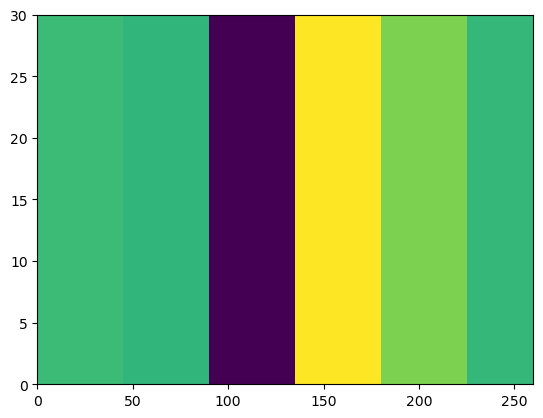

In [424]:
i = [22, 26]
xplot = d_train["x"][6,:,:]
plt.pcolormesh(xplot)

In [293]:
phase1days = d_train["x"].sel(time = (nonnans))

KeyError: "not all values found in index 'time'"

In [221]:
RMM1 = 0.101895
RMM2 = 1.20419

dY = RMM2
dX = RMM1

angle_deg = np.abs(np.arctan(dX/dY) * 180 * np.pi)
print(angle_deg)
if angle_deg > 360: 
    angle_deg = angle_deg - 360 #TODO: Confirm this choice

print(angle_deg)
magnitude = np.sqrt(RMM1**2 + RMM2**2)

# (1) If the magnitude of the line of coord (RMM1, RMM2) < 0 - phase 0 (Non-phase)
if magnitude <= 1: 
    phases[samplecoord, iens] = 0

47.736097783927846
47.736097783927846


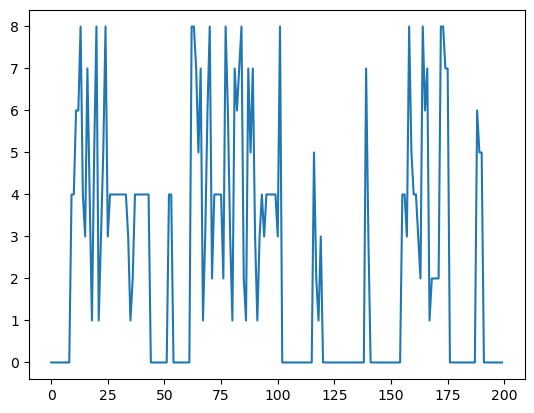

In [192]:
plt.plot(phases[1000:1200,2])

1.0
(60105, 7)


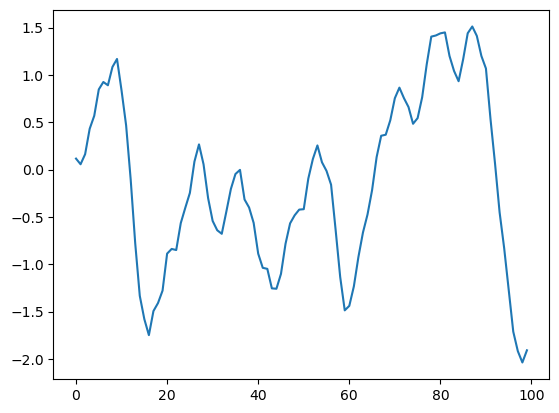

In [124]:
plt.plot(MJO_train[20000:20100,3])
print(MJO_train[:,6].min())
print(MJO_test.shape)

In [181]:
mjototal = np.array([MJO_train, MJO_val, MJO_test])
print(mjototal.shape)

type(mjototal)
mjototal[0,:,0].shape

(3, 60105, 7)


(60105,)

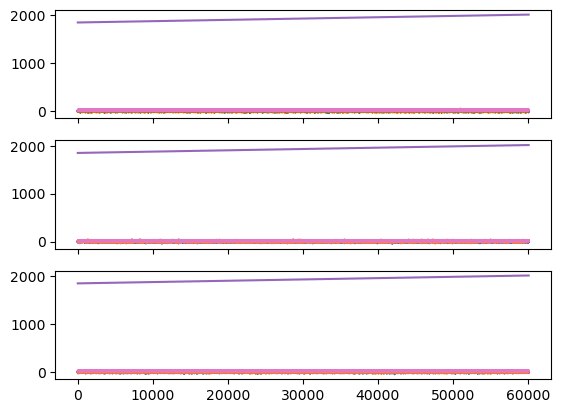

In [74]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
ax[0].plot(MJO_train, label = 'ens1')
ax[1].plot(MJO_val, label = 'ens2')
ax[2].plot(MJO_test, label = 'ens3')

/System/Volumes/Data/Users/C830793391/miniconda3/pkgs/libtiff-4.5.1-h313beb8_0/lib/libtiff.5.dylib


/System/Volumes/Data/Users/C830793391/miniconda3/envs/jvp1/lib/libtiff.5.dylib

Users/C830793391/miniconda3/envs/env-torch/lib/libtiff.6.dylib




In [ ]:
# import gzip, pickle

# data_savename = "/Users/eabarnes/big_data/e3sm_v2/presaved_data/exp001_train.pkl"
# with gzip.open(data_savename, "wb") as fp:
#     pickle.dump(x_train, fp)
#     pickle.dump(labels_train, fp)

#     pickle.dump(x_mean, fp)
#     pickle.dump(x_std, fp)
    
#     pickle.dump(lat, fp)
#     pickle.dump(lon, fp)

# data_savename = "/Users/eabarnes/big_data/e3sm_v2/presaved_data/exp001_val_test.pkl"
# with gzip.open(data_savename, "wb") as fp:
#     pickle.dump(x_val, fp)
#     pickle.dump(labels_val, fp)

#     pickle.dump(x_test, fp)
#     pickle.dump(labels_test, fp)
    
#     pickle.dump(lat, fp)
#     pickle.dump(lon, fp)